In [1]:
import pandas as pd, numpy as np, geopandas as gpd, rasterio as rio

from rasterio.plot import show
from rasterio.mask import mask
import earthpy.plot as ep
import earthpy.spatial as es

import warnings
import matplotlib.pyplot as plt
from shapely.geometry import mapping
warnings.filterwarnings('ignore')

import sys
sys.path.append('..')
from src import user_function as utils 

In [2]:
# Principal shp data  
shp_data = gpd.read_file("../data/0_shapefile/pos_gdf.shp").to_crs(epsg=4326)
shp_data.head(2)

,index,id_distr_b,year,newid,baseline_P,geometry
0,0,204,2015,3185,473,"POLYGON ((71.48246 34.14608, 71.48349 34.14576..."
1,1,203,2015,3185,472,"POLYGON ((71.48246 34.14608, 71.48349 34.14576..."


- review: 
    - nightlight: 582
    - srtm: 259, 582

In [3]:
nightlight_tiff = '../data/8_night_light/pk_night_light.tiff'
srtm_tif = "../data/6_srtm/PK_srtm.tif"

<Axes: >

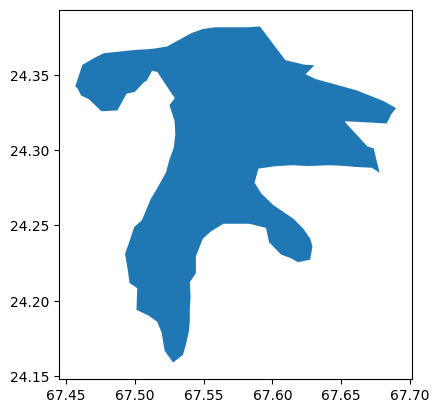

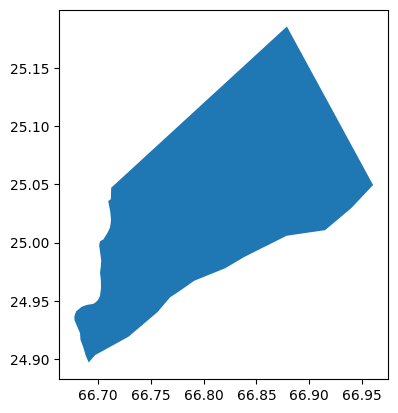

In [4]:
psu = [259, 582, 17]
sample_shp = shp_data.query("baseline_P in @psu")
s_259 = sample_shp.query("baseline_P == 259")
s_582 = sample_shp.query("baseline_P == 582")
s_259.plot()
s_582.plot()

True

night

In [11]:
df = utils.crop_raster(nightlight_tiff, s_582)
# solve: abs(-3.400000e+38) < 1.0e+100
df = utils.points_inside(df, s_582)
df.sort_values(['z']).z.std()

4.1333528

srtm

In [19]:
df = utils.crop_raster(srtm_tif, s_259)
df = utils.points_inside(df,  s_259)
df

,x,y,z,geometry,index_right,index,id_distr_b,year,newid,baseline_P
403,67.557083,24.381250,3.0,POINT (67.55708 24.38125),162,162,260,2015,24553,259
404,67.557917,24.381250,3.0,POINT (67.55792 24.38125),162,162,260,2015,24553,259
405,67.558750,24.381250,3.0,POINT (67.55875 24.38125),162,162,260,2015,24553,259
406,67.559583,24.381250,4.0,POINT (67.55958 24.38125),162,162,260,2015,24553,259
407,67.560417,24.381250,4.0,POINT (67.56042 24.38125),162,162,260,2015,24553,259
...,...,...,...,...,...,...,...,...,...,...
75097,67.527083,24.160417,0.0,POINT (67.52708 24.16042),162,162,260,2015,24553,259
75098,67.527917,24.160417,1.0,POINT (67.52792 24.16042),162,162,260,2015,24553,259
75099,67.528750,24.160417,2.0,POINT (67.52875 24.16042),162,162,260,2015,24553,259
75100,67.529583,24.160417,1.0,POINT (67.52958 24.16042),162,162,260,2015,24553,259
